In [89]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

##### exploring the data

In [90]:
data = load_iris()

features = data.data
feature_names = data.feature_names

target = data.target
target_name = data.target_names

In [95]:
target, target_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['setosa', 'versicolor', 'virginica'], 
       dtype='|S10'))

In [92]:
def data_visualisation(first_feature, second_feature, target_name):
    '''plot input data, first_feature and second_feature are elements of feature_names list'''
    for t in range(3):
        if t==0:
            c = 'r'
            marker = '>'
        elif t==1:
            c = 'g'
            marker = 'o'
        elif t==2:
            c = 'b'
            marker = 'x'
        plt.scatter([features[target==t, first_feature]],
                    [features[target==t, second_feature]],
                    c=c,
                    marker=marker)    
    
    plt.legend([target_name for target_name in target_name])
    plt.xlabel('%s' % feature_name[first_feature])
    plt.ylabel('%s' % feature_name[second_feature])
    plt.show()

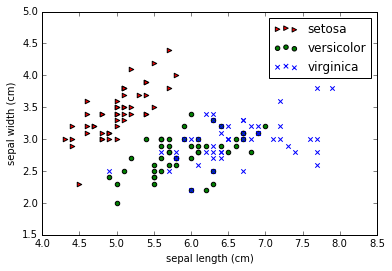

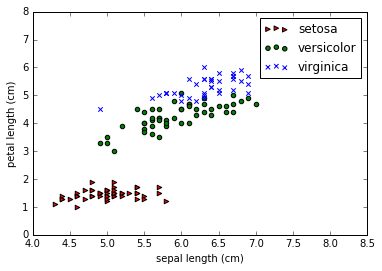

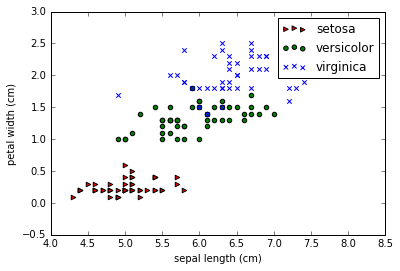

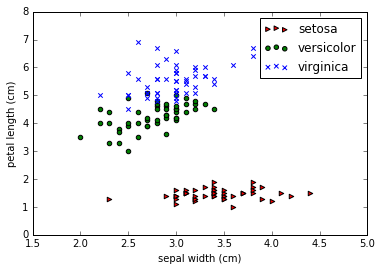

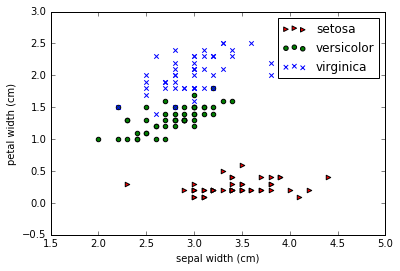

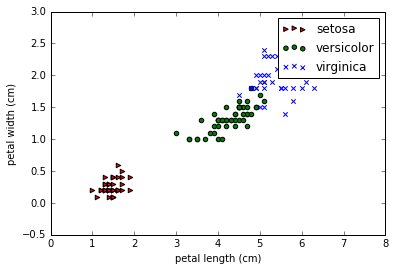

In [93]:
data_visualisation(0, 1, target_name)
data_visualisation(0, 2, target_name)
data_visualisation(0, 3, target_name)
data_visualisation(1, 2, target_name)
data_visualisation(1, 3, target_name)
data_visualisation(2, 3, target_name)

##### classification IRIS setosa by petal length < 2

In [99]:
#finding maximum length of setosa petal
labels = target_names[target]
is_setosa = (labels == 'setosa')
plength = features[:, 2]
max_setosa = plength[is_setosa].max()
print 'Maximum of setosa petal length is {}'.format(max_setosa)

Maximum of setosa petal length is 1.9


In [100]:
#finding minimum length of others petal
min_non_setosa = plength[~is_setosa].min()
print 'Minimum of non setosa petal length is {}'.format(min_non_setosa)

Minimum of non setosa petal length is 3.0


In [101]:
#finding best classification for virginica and versicolor
features = features[~is_setosa]
labels = labels[~is_setosa]
is_virginica = (labels == 'virginica')

best_acc = -1.0
for fi in range(features.shape[1]):
    for t in features[:, fi]:
        feature_i = features[:, fi]
        pred = (feature_i > t)
        acc = (pred == is_virginica).mean()